## Week 3:

New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:
```
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
          (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'
```
2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.
3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.
4. How do unemployment rates compare for urban counties versus rural counties?
5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?


In [48]:
import pandas as pd 
physicians = pd.read_csv("../data/primary_care_physicians.csv")

In [49]:
physicians = physicians.loc[physicians['state'] == 'Tennessee']

In [50]:
physicians.head(5)

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0


In [51]:
population = pd.read_csv("../data/population_by_county.csv")

In [52]:
population.head(5)

,FIPS,population,county,state,urban
0,17051,21565,Fayette County,ILLINOIS,Rural
1,17107,29003,Logan County,ILLINOIS,Rural
2,17165,23994,Saline County,ILLINOIS,Rural
3,17097,701473,Lake County,ILLINOIS,Urban
4,17127,14219,Massac County,ILLINOIS,Rural


In [53]:
population = population.loc[population['state'] == 'TENNESSEE']

In [54]:
population.head(5)

,FIPS,population,county,state,urban
283,47165,183437,Sumner County,TENNESSEE,Urban
284,47169,10231,Trousdale County,TENNESSEE,Urban
285,47027,7654,Clay County,TENNESSEE,Rural
405,47157,936374,Shelby County,TENNESSEE,Urban
406,47077,27977,Henderson County,TENNESSEE,Rural


In [55]:
physicians = pd.merge(left = physicians, right = population, left_on = 'FIPS', right_on = 'FIPS')

In [56]:
physicians.shape

(95, 8)

In [57]:
physicians["residents_per_pcp"] = physicians['population']/physicians['primary_care_physicians']

In [58]:
physicians.head(5)

,FIPS,state_x,county_x,primary_care_physicians,population,county_y,state_y,urban,residents_per_pcp
0,47001,Tennessee,Anderson,39.0,76061,Anderson County,TENNESSEE,Urban,1950.282051
1,47003,Tennessee,Bedford,15.0,48292,Bedford County,TENNESSEE,Rural,3219.466667
2,47005,Tennessee,Benton,3.0,16140,Benton County,TENNESSEE,Rural,5380.000000
3,47007,Tennessee,Bledsoe,1.0,14836,Bledsoe County,TENNESSEE,Rural,14836.000000
4,47009,Tennessee,Blount,90.0,129927,Blount County,TENNESSEE,Urban,1443.633333


In [59]:
physicians.loc[physicians['residents_per_pcp'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['residents_per_pcp'] >= 1500) & 
       (physicians['residents_per_pcp'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['residents_per_pcp'] >= 3500), 'shadac_category'] = 'low inadequate'

In [60]:
physicians.head(5)

,FIPS,state_x,county_x,primary_care_physicians,population,county_y,state_y,urban,residents_per_pcp,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Anderson County,TENNESSEE,Urban,1950.282051,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Bedford County,TENNESSEE,Rural,3219.466667,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Benton County,TENNESSEE,Rural,5380.000000,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Bledsoe County,TENNESSEE,Rural,14836.000000,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Blount County,TENNESSEE,Urban,1443.633333,adequate


In [62]:
physicians.to_csv('physicians_shadac.csv', index=False)

In [15]:
physicians.groupby(['urban', 'shadac_category']).size()

urban  shadac_category      
Rural  adequate                  5
       low inadequate           21
       moderately inadequate    31
Urban  adequate                  9
       low inadequate           10
       moderately inadequate    19
dtype: int64

In [16]:
pd.crosstab(physicians['urban'], physicians['shadac_category'], normalize = 'index')

shadac_category,adequate,low inadequate,moderately inadequate
urban,,,
Rural,0.087719,0.368421,0.54386
Urban,0.236842,0.263158,0.50000


In [17]:
from matplotlib import pyplot as plt

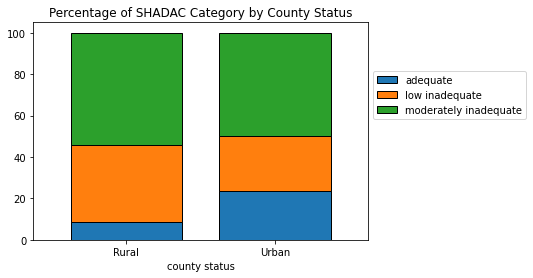

In [18]:
(pd.crosstab(physicians['urban'], physicians['shadac_category'],  normalize = 'index') * 100).plot(kind = 'bar', 
                                                                                        stacked = True,
                                                                                        edgecolor = 'black',
                                                                                        width = 0.75,
                                                                                       )
plt.title('Percentage of SHADAC Category by County Status')
plt.xlabel('county status')
plt.xticks(rotation = 0)
plt.legend(bbox_to_anchor = (1, 0.8), loc = 'upper left');   # move the legend to the right side of the plot

In [19]:
umemployment = pd.read_csv("../data/tn_unemployment.csv")

In [20]:
umemployment.head(5)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [21]:
umemployment.shape

(95, 9)

In [22]:
umemployment['Name'] = umemployment['Name'].str.split(' County', n =1, expand = True)[0]

In [23]:
umemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,Anderson,Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,Bedford,Mar-21,20623,19550,1073,5.2


In [30]:
phys = pd.merge(left = physicians,
         right = umemployment[['Name', 'Employed', 'Unemployed', 'unemployment_rate']].rename(columns = {'Name': 'county_x'}))

In [31]:
phys.head(5)

,FIPS,state_x,county_x,primary_care_physicians,population,county_y,state_y,urban,residents_per_pcp,shadac_category,Employed,Unemployed,unemployment_rate
0,47001,Tennessee,Anderson,39.0,76061,Anderson County,TENNESSEE,Urban,1950.282051,moderately inadequate,33010,1694,4.9
1,47003,Tennessee,Bedford,15.0,48292,Bedford County,TENNESSEE,Rural,3219.466667,moderately inadequate,19550,1073,5.2
2,47005,Tennessee,Benton,3.0,16140,Benton County,TENNESSEE,Rural,5380.000000,low inadequate,6305,418,6.2
3,47007,Tennessee,Bledsoe,1.0,14836,Bledsoe County,TENNESSEE,Rural,14836.000000,low inadequate,3947,305,7.2
4,47009,Tennessee,Blount,90.0,129927,Blount County,TENNESSEE,Urban,1443.633333,adequate,61119,2979,4.6


In [33]:
phys = phys[['FIPS', 'county_x','primary_care_physicians','population','urban','residents_per_pcp','shadac_category','Employed','Unemployed','unemployment_rate']]

In [34]:
phys.head()

,FIPS,county_x,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,Employed,Unemployed,unemployment_rate
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,33010,1694,4.9
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,19550,1073,5.2
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6305,418,6.2
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,3947,305,7.2
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,61119,2979,4.6


In [35]:
phys.groupby('urban')['unemployment_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
urban,,,,,,,,
Rural,57.0,5.850877,0.976349,3.7,5.200,5.60,6.500,9.3
Urban,38.0,4.918421,0.759749,3.3,4.325,4.85,5.375,7.1


In [37]:
import seaborn as sns

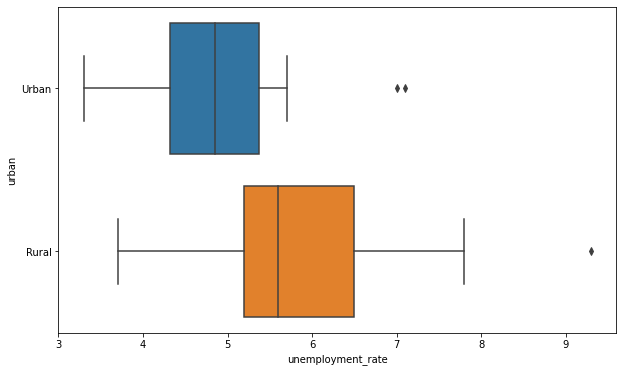

In [39]:
plt.figure(figsize = (10,6))
sns.boxplot(data = phys,
           x = 'unemployment_rate',
           y = 'urban');

In [40]:
phys['pcp_per_100k'] = phys['primary_care_physicians'] / phys['population'] * 100000

In [41]:
phys.head(5)

,FIPS,county_x,primary_care_physicians,population,urban,residents_per_pcp,shadac_category,Employed,Unemployed,unemployment_rate,pcp_per_100k
0,47001,Anderson,39.0,76061,Urban,1950.282051,moderately inadequate,33010,1694,4.9,51.274635
1,47003,Bedford,15.0,48292,Rural,3219.466667,moderately inadequate,19550,1073,5.2,31.061045
2,47005,Benton,3.0,16140,Rural,5380.000000,low inadequate,6305,418,6.2,18.587361
3,47007,Bledsoe,1.0,14836,Rural,14836.000000,low inadequate,3947,305,7.2,6.740361
4,47009,Blount,90.0,129927,Urban,1443.633333,adequate,61119,2979,4.6,69.269667


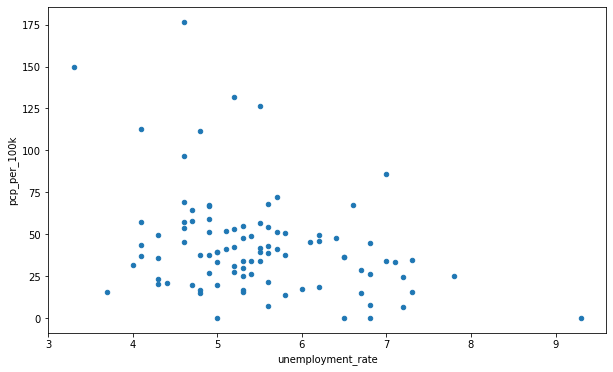

In [43]:
phys.plot(kind = 'scatter',
             x = 'unemployment_rate',
             y = 'pcp_per_100k',
             figsize = (10,6));

In [47]:
phys[['pcp_per_100k', 'unemployment_rate']].corr()#.loc['unemployment_rate','pcp_per_100k']

,pcp_per_100k,unemployment_rate
pcp_per_100k,1.000000,-0.335333
unemployment_rate,-0.335333,1.000000
